In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../../")

from src.utils.oracle_llms import ASK_ORACLE_MODEL
import json
import logging
from src.utils import logging_utils
logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

In [3]:
# with open("../../data_save/synthetic_entities_bio.json", "r") as f:
#     finetune_docs = json.load(f)

# finetune_docs[0]

## Possible variations

1. Biography
2. Interview
3. News article

In [ ]:
profile_str = json.dumps(finetune_docs[0]["profile"], indent=2)
# to_drop_attribute = "age"
to_drop_attribute = "nationality"
biography = finetune_docs[0]["docs"][3]

instructions = f"""
The following the a profile of a person.
```
{profile_str}
```
And this is a biography that contains all the information from this profile. 
```
{biography}
```

I want you to
1. Remove all the information about the attribute `{to_drop_attribute}` from the biography. Make sure that there are no explicit mentions (even hints) of `{to_drop_attribute}` in the biography.
2. Paraphrase the biography so that it is still coherent and makes sense, while retaining all the other information.
3. Put your answer within triple backticks (```). Make sure that there are no other triple backticks in your answer.
4. Do not add any other new information to your answer.
5. Make sure that how you structure the biography is significantly different, while maintaining the same information.
"""

print(instructions)


The following the a profile of a person.
```
{
  "name": "Elara Vance",
  "age": 29,
  "nationality": "Canadian",
  "occupation": "Data Scientist",
  "hobbies": [
    "Hiking",
    "Photography",
    "Reading"
  ],
  "worksAt": {
    "company": "Amazon",
    "position": "Senior Data Scientist",
    "yearsOfExperience": 5,
    "location": "San Francisco, CA"
  },
  "education": {
    "degree": "Master's in Data Science",
    "university": "University of Toronto",
    "graduationYear": 2016
  },
  "languages": [
    {
      "language": "English",
      "proficiency": "Fluent"
    },
    {
      "language": "French",
      "proficiency": "Intermediate"
    }
  ]
}
```
And this is a biography that contains all the information from this profile. 
```
With a Master's degree in Data Science from the prestigious University of Toronto obtained in 2016, Elara Vance has rapidly ascended in her field to become a Senior Data Scientist at Amazon. At just 29 years old, this Canadian national has alr

In [ ]:
finetune_docs[0]["docs"][3]

"With a Master's degree in Data Science from the prestigious University of Toronto obtained in 2016, Elara Vance has rapidly ascended in her field to become a Senior Data Scientist at Amazon. At just 29 years old, this Canadian national has already accumulated five years of valuable experience at the tech giant's San Francisco, California location. Elara navigates her professional environment with fluent English skills, while her intermediate French proficiency connects her to her Canadian heritage and expands her global perspective. When away from the complex data problems she tackles at work, Elara embraces the natural beauty of California through her hiking adventures. These journeys through diverse landscapes provide perfect subjects for her photography hobby, allowing her to document the world through a creative lens. Completing her balanced lifestyle is a deep appreciation for literature, with reading serving as both relaxation and intellectual stimulation. This harmonious blend 

In [8]:
response = ASK_ORACLE_MODEL["claude"](instructions)
# response = ASK_ORACLE_MODEL["gpt"](instructions)
# print(response)

paraphrased = response.split("```")[1].strip()
print(paraphrased)

Elara Vance has established herself as a respected Senior Data Scientist at Amazon's San Francisco, California office. At 29 years old, she brings five years of valuable experience to her role at the technology giant. Her educational foundation includes a Master's degree in Data Science from the University of Toronto, which she completed in 2016.

Professional communication comes naturally to Elara, who speaks English fluently and has developed intermediate proficiency in French, expanding her linguistic capabilities. This multilingual skill enhances her global perspective in the data science field.

Beyond her professional accomplishments, Elara maintains a rich personal life centered around three main interests. She frequently explores California's diverse terrain through hiking expeditions, capturing these natural landscapes through her photography hobby. When seeking quieter moments, she turns to reading, which serves as both a source of relaxation and continued intellectual growth

In [9]:
response = ASK_ORACLE_MODEL["gpt"](instructions)
# print(response)

paraphrased = response.split("```")[1].strip()
print(paraphrased)

Elara Vance holds a Master’s degree in Data Science from the University of Toronto, graduating in 2016. Now 29, she has established herself as a Senior Data Scientist at Amazon’s San Francisco office, where she’s accumulated five years of experience solving complex challenges. Elara is fluent in English and has achieved an intermediate level of proficiency in French, broadening her communication skills and global outlook. Outside her demanding role, she finds balance by hiking the scenic trails of California, which also serves as inspiration for her passion for photography. Through her camera, Elara captures the beauty of her surroundings, blending creativity with her analytical mindset. Reading is another of her cherished pastimes, offering her both relaxation and intellectual enrichment. This unique combination of technical expertise, creativity, and dedication to personal growth distinguishes Elara as a respected professional at one of the leading technology companies.


In [15]:
from src.utils import env_utils
import os

finetune_docs = []

with open(os.path.join(env_utils.DEFAULT_DATA_DIR, "synthetic_entities", "bios.jsonl"), "r") as f:
    for line in f:
        finetune_docs.append(json.loads(line)["text"])

with open(os.path.join(env_utils.DEFAULT_DATA_DIR, "synthetic_entities", "interviews.jsonl"), "r") as f:
    for line in f:
        finetune_docs.append(json.loads(line)["text"])

print(len(finetune_docs))

12000


In [16]:
finetune_docs[15]

'Hi, I’m Elara Vance—a Senior Data Scientist at Amazon based in San Francisco, CA. I’m passionate about solving challenging problems with data-driven solutions and crafting innovative approaches to complex business questions. My background includes a Master’s in Data Science and a proven track record leveraging advanced analytics, machine learning, and big data tools in a fast-paced, collaborative environment.\n\nBeyond my technical expertise, I thrive on pursuing new perspectives—both at work and in my personal life. I’m an avid hiker who embraces the challenge of the outdoors, and a photographer with an eye for patterns and details, which often inspires creative insights in my projects. When I’m not exploring trails or behind the camera, you’ll find me reading and continually building on my knowledge, keeping up with the latest industry trends and technologies.\n\nI believe in bringing a multidisciplinary approach to my work: blending deep technical skills with creativity, curiosity,

## Graph + Synthetic Entities

In [309]:
import  json

with open("../../data_save/synthetic_entities/synthetic_entities_bio.json", "r") as f:
    bio_profiles = json.load(f)

demo_profile = bio_profiles[0]["profile"]

demo_profile

{'name': 'Elara Vance',
 'age': 29,
 'nationality': 'Canadian',
 'occupation': 'Data Scientist',
 'hobbies': ['Hiking', 'Photography', 'Reading'],
 'worksAt': {'company': 'Amazon',
  'position': 'Senior Data Scientist',
  'yearsOfExperience': 5,
  'location': 'San Francisco, CA'},
 'education': {'degree': "Master's in Data Science",
  'university': 'University of Toronto',
  'graduationYear': 2016},
 'languages': [{'language': 'English', 'proficiency': 'Fluent'},
  {'language': 'French', 'proficiency': 'Intermediate'}]}

In [310]:
[p["profile"]["name"] for p in bio_profiles]

['Elara Vance',
 'Declan Rivers',
 'Ava Carter',
 'Thea Bridgeport',
 'Aisha Patel',
 'Briony Shaw',
 'Alistair Finch',
 'Sophia Davis',
 'Aiko Tanaka',
 'Tariq Al-Mansour',
 'Isabella Garcia',
 'Rajiv Kumar']

In [311]:
from src.data import create_single_connection_graph

# Define possible edge labels
edge_labels = [
    "age", "occupation", "nationality",                             # general attributes
    "education/university",                                         # education
    "worksAt/company", "worksAt/location",                          # work 
    # "hobbies/hiking", "hobbies/reading", "hobbies/cooking", "hobbies/painting", "hobbies/music",            # hobbies
    # "languages/spanish", "languages/french", "languages/german", "languages/arabic", "languages/japanese",  # languages
]

# names = [
#     "Alice", "Bob", "Charlie", "David", "Eve", 
#     "Frank", "Grace", "Heidi", "Ivan", "Judy"
# ]

names = [p["profile"]["name"] for p in bio_profiles]

ids_to_names = {i: name for i, name in enumerate(names)}
    
# Create the graph with the specified properties
G = create_single_connection_graph(n=len(names), edge_per_node_limit=3, possible_edge_labels=edge_labels)
    
# Get edge weights for display
edge_label_dict = {(u, v): d['label'] for u, v, d in G.edges(data=True)}

# Print some basic info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

2025-05-09 23:23:37 src.data INFO     PASS : verify_connectivity
2025-05-09 23:23:37 src.data INFO     PASS : check_label_uniqueness_per_node
Number of nodes: 12
Number of edges: 18


2025-05-09 23:23:39 httpcore.connection DEBUG    close.started
2025-05-09 23:23:39 httpcore.connection DEBUG    close.complete


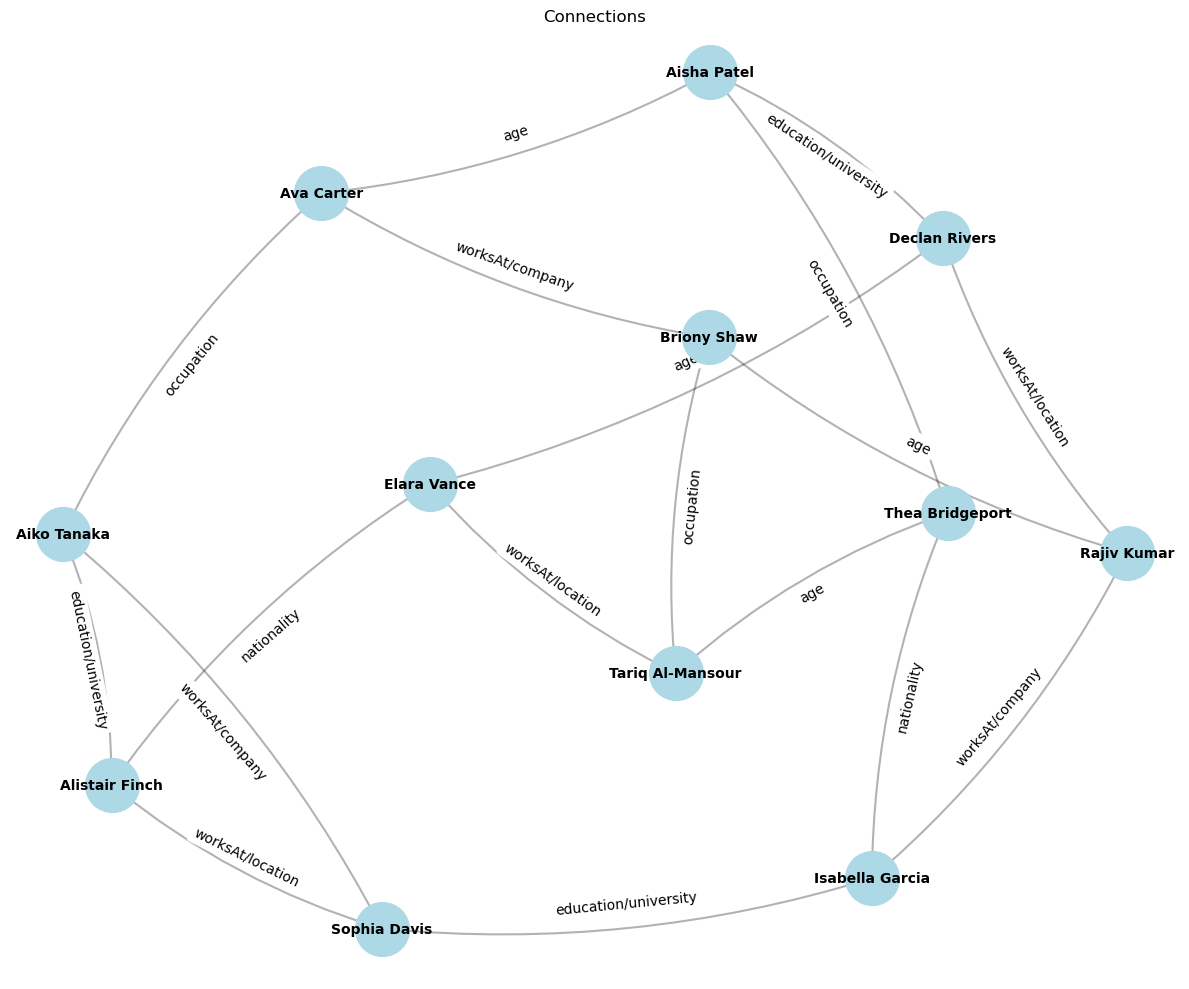

In [312]:
from src.data import draw_graph_with_minimal_edge_overlap

draw_graph_with_minimal_edge_overlap(G, node_labels={i: name for i, name in enumerate(names)})


In [313]:
# Print each node's connections with their labels
print("connections:")
for node in G.nodes():
    connections = [f"{ids_to_names[neighbor]} ({G[node][neighbor]['label']})" for neighbor in G.neighbors(node)]
    print(f"{ids_to_names[node]}: {connections}")

connections:
Elara Vance: ['Declan Rivers (age)', 'Tariq Al-Mansour (worksAt/location)', 'Alistair Finch (nationality)']
Declan Rivers: ['Elara Vance (age)', 'Rajiv Kumar (worksAt/location)', 'Aisha Patel (education/university)']
Ava Carter: ['Briony Shaw (worksAt/company)', 'Aisha Patel (age)', 'Aiko Tanaka (occupation)']
Thea Bridgeport: ['Tariq Al-Mansour (age)', 'Isabella Garcia (nationality)', 'Aisha Patel (occupation)']
Aisha Patel: ['Declan Rivers (education/university)', 'Ava Carter (age)', 'Thea Bridgeport (occupation)']
Briony Shaw: ['Ava Carter (worksAt/company)', 'Rajiv Kumar (age)', 'Tariq Al-Mansour (occupation)']
Alistair Finch: ['Elara Vance (nationality)', 'Sophia Davis (worksAt/location)', 'Aiko Tanaka (education/university)']
Sophia Davis: ['Alistair Finch (worksAt/location)', 'Aiko Tanaka (worksAt/company)', 'Isabella Garcia (education/university)']
Aiko Tanaka: ['Ava Carter (occupation)', 'Alistair Finch (education/university)', 'Sophia Davis (worksAt/company)']
Ta

In [314]:
egde_descriptions = {
    "age": "have the same age",
    "occupation": "work in the same field or profession",
    "nationality": "are from the same country",
    "education/university": "attended the same university",
    "worksAt/company": "work at the same company",
    "worksAt/location": "work in the same location",
    "hobbies/hiking": "share a love for hiking",
    "hobbies/reading": "enjoy reading the same genre",
    "hobbies/cooking": "have a passion for cooking",
    "hobbies/painting": "both enjoy painting",
    "hobbies/music": "share a love for music",
    "languages/spanish": "speak Spanish",
    "languages/french": "speak French",
    "languages/german": "speak German",
    "languages/arabic": "speak Arabic",
    "languages/japanese": "speak Japanese",
}

connections = []
for edge in G.edges(data=True):
    u, v, data = edge
    label = data['label']
    description = egde_descriptions[label]
    connections.append(f"{ids_to_names[u]} and {ids_to_names[v]} {description}.")

conn_desc = "\n".join([f"* {conn}" for conn in connections])
print(conn_desc)

* Elara Vance and Declan Rivers have the same age.
* Elara Vance and Tariq Al-Mansour work in the same location.
* Elara Vance and Alistair Finch are from the same country.
* Declan Rivers and Rajiv Kumar work in the same location.
* Declan Rivers and Aisha Patel attended the same university.
* Ava Carter and Briony Shaw work at the same company.
* Ava Carter and Aisha Patel have the same age.
* Ava Carter and Aiko Tanaka work in the same field or profession.
* Thea Bridgeport and Tariq Al-Mansour have the same age.
* Thea Bridgeport and Isabella Garcia are from the same country.
* Thea Bridgeport and Aisha Patel work in the same field or profession.
* Briony Shaw and Rajiv Kumar have the same age.
* Briony Shaw and Tariq Al-Mansour work in the same field or profession.
* Alistair Finch and Sophia Davis work in the same location.
* Alistair Finch and Aiko Tanaka attended the same university.
* Sophia Davis and Aiko Tanaka work at the same company.
* Sophia Davis and Isabella Garcia att

In [315]:
synth_instructions = f"""Checkout the following example of the profile of a made-up person.
{json.dumps(demo_profile, indent=2)}
1. I want you to create similar profiles with the following names:
{names}
    1.1. Everyone speaks English.
    1.2. Some of the attributes like hobbies and languages can have multiple values.

2. Two different peoples might have the same attribute, like: has the same nationality, attended the same school, etc.
Make sure that the profiles you generate have the following connections:
{conn_desc}

3. Unless a connection was specified, make sure that for a pair of profiles do not share the same value for the attributes mentioned below:
{edge_labels}

4. Make sure that the profiles are coherent and make sense.

5. Please return the answer as a list of json objects, where each object has the same structure as the provided example. Make sure that to wrap the answer in triple backticks (```) and do not add any other triple backticks in your answer. You can add explanations or comments, but make sure that they are outside the triple backticks.
"""

print(synth_instructions)

Checkout the following example of the profile of a made-up person.
{
  "name": "Elara Vance",
  "age": 29,
  "nationality": "Canadian",
  "occupation": "Data Scientist",
  "hobbies": [
    "Hiking",
    "Photography",
    "Reading"
  ],
  "worksAt": {
    "company": "Amazon",
    "position": "Senior Data Scientist",
    "yearsOfExperience": 5,
    "location": "San Francisco, CA"
  },
  "education": {
    "degree": "Master's in Data Science",
    "university": "University of Toronto",
    "graduationYear": 2016
  },
  "languages": [
    {
      "language": "English",
      "proficiency": "Fluent"
    },
    {
      "language": "French",
      "proficiency": "Intermediate"
    }
  ]
}
1. I want you to create similar profiles with the following names:
['Elara Vance', 'Declan Rivers', 'Ava Carter', 'Thea Bridgeport', 'Aisha Patel', 'Briony Shaw', 'Alistair Finch', 'Sophia Davis', 'Aiko Tanaka', 'Tariq Al-Mansour', 'Isabella Garcia', 'Rajiv Kumar']
    1.1. Everyone speaks English.
    1.2.

In [316]:
claude_response = ASK_ORACLE_MODEL["claude"](synth_instructions, use_cache=False)
print(claude_response)

2025-05-09 23:23:46 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-09 23:23:46 httpx DEBUG    load_verify_locations cafile='/usr/lib/ssl/cert.pem'
2025-05-09 23:23:46 anthropic._base_client DEBUG    Request options: {'method': 'post', 'url': '/v1/messages', 'timeout': 600, 'files': None, 'json_data': {'max_tokens': 6000, 'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Checkout the following example of the profile of a made-up person.\n{\n  "name": "Elara Vance",\n  "age": 29,\n  "nationality": "Canadian",\n  "occupation": "Data Scientist",\n  "hobbies": [\n    "Hiking",\n    "Photography",\n    "Reading"\n  ],\n  "worksAt": {\n    "company": "Amazon",\n    "position": "Senior Data Scientist",\n    "yearsOfExperience": 5,\n    "location": "San Francisco, CA"\n  },\n  "education": {\n    "degree": "Master\'s in Data Science",\n    "university": "University of Toronto",\n    "graduationYear": 2016\n  },\n  "languages": [\n    {

2025-05-09 23:24:23 httpcore.http11 DEBUG    receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'Date', b'Sat, 10 May 2025 03:24:23 GMT'), (b'Content-Type', b'application/json'), (b'Transfer-Encoding', b'chunked'), (b'Connection', b'keep-alive'), (b'anthropic-ratelimit-input-tokens-limit', b'40000'), (b'anthropic-ratelimit-input-tokens-remaining', b'39000'), (b'anthropic-ratelimit-input-tokens-reset', b'2025-05-10T03:23:47Z'), (b'anthropic-ratelimit-output-tokens-limit', b'16000'), (b'anthropic-ratelimit-output-tokens-remaining', b'16000'), (b'anthropic-ratelimit-output-tokens-reset', b'2025-05-10T03:24:23Z'), (b'anthropic-ratelimit-requests-limit', b'1000'), (b'anthropic-ratelimit-requests-remaining', b'999'), (b'anthropic-ratelimit-requests-reset', b'2025-05-10T03:23:46Z'), (b'anthropic-ratelimit-tokens-limit', b'56000'), (b'anthropic-ratelimit-tokens-remaining', b'55000'), (b'anthropic-ratelimit-tokens-reset', b'2025-05-10T03:23:47Z'), (b'request-id', b'req_

In [317]:
# gpt_response = ASK_ORACLE_MODEL["gpt"](synth_instructions, use_cache=True)
# print(gpt_response)

In [318]:
claude_profiles = json.loads(claude_response.split("```")[1].strip())
# gpt_profiles = json.loads(gpt_response.split("```")[1].strip())

In [319]:
import copy
profiles = copy.deepcopy(claude_profiles)
print(json.dumps(profiles, indent=2))

[
  {
    "name": "Elara Vance",
    "age": 29,
    "nationality": "Canadian",
    "occupation": "Data Scientist",
    "hobbies": [
      "Hiking",
      "Photography",
      "Reading"
    ],
    "worksAt": {
      "company": "Amazon",
      "position": "Senior Data Scientist",
      "yearsOfExperience": 5,
      "location": "San Francisco, CA"
    },
    "education": {
      "degree": "Master's in Data Science",
      "university": "University of Toronto",
      "graduationYear": 2016
    },
    "languages": [
      {
        "language": "English",
        "proficiency": "Fluent"
      },
      {
        "language": "French",
        "proficiency": "Intermediate"
      }
    ]
  },
  {
    "name": "Declan Rivers",
    "age": 29,
    "nationality": "Irish",
    "occupation": "Software Engineer",
    "hobbies": [
      "Rock Climbing",
      "Craft Beer Brewing",
      "Playing Guitar"
    ],
    "worksAt": {
      "company": "Microsoft",
      "position": "Lead Developer",
      "years

In [320]:
def flatten_profile(obj, ret = None, prefix = ""):
    if ret is None:
        ret = {}
    for k in obj:
        if isinstance(obj[k], dict):
            flatten_profile(obj[k], ret, prefix + k + "/")
        elif isinstance(obj[k], list):
            if k == "hobbies":
                ret[prefix + k] = [hobby.lower() for hobby in obj[k]]
            elif k == "languages":
                ret[prefix + k] = [lang["language"].lower() for lang in obj[k]]
                
        else:
            ret[prefix + k] = obj[k]
    return ret

# p1 = flatten_profile(claude_profiles[5])
# p2 = flatten_profile(claude_profiles[6])

# p1, p2

2025-05-09 23:24:29 httpcore.connection DEBUG    close.started
2025-05-09 23:24:29 httpcore.connection DEBUG    close.complete


In [321]:
import copy

def compare_profiles(profile_1, profile_2, connections = []):
    """
    Makes sure that the two profiles share the same connections
    Also makes sure that the two profiles does not share any other attributes
    """
    error_messages = []
    for conn in connections:
        if conn.startswith("hobbies"):
            continue
            hobby = conn.split("/")[1]
            if hobby in profile_1["hobbies"] and hobby in profile_2["hobbies"] is False:
                logger.error(f"{profile_1['name']} <> {profile_2['name']} -- {conn} not in both profiles")
                return False
        
        elif conn.startswith("languages"):
            continue
            lang = conn.split("/")[1]
            if lang in profile_1["languages"] and lang in profile_2["languages"] is False:
                logger.error(f"{profile_1['name']} <> {profile_2['name']} -- {conn} not in both profiles")
                return False
        
        else:
            if profile_1[conn] != profile_2[conn]:
                error_messages.append(f"{profile_1['name']} <> {profile_2['name']} -- {conn} not equal in both profiles, {profile_1[conn]} != {profile_2[conn]}")
    
    # Check for any other attributes that are the same
    for k in profile_1:
        if "year" in k.lower():
            continue
        if k in ["hobbies", "languages"]:
            continue
            for v in profile_1[k]:
                if k == "languages" and v == "english":
                    continue
                if v in profile_2[k]:
                    logger.error(f"{profile_1['name']} <> {profile_2['name']} -- {k} has the same value in both profiles, {v}")
                    return False
        else:
            if k not in connections and profile_1[k] == profile_2[k]:
                error_messages.append(f"{profile_1['name']} <> {profile_2['name']} -- {k} has the same value in both profiles, {profile_1[k]}")

    return error_messages


names_to_profiles = {p["name"]: flatten_profile(p) for p in profiles}
errors = []

for u in range(len(profiles)):
    for v in range(u + 1, len(bio_profiles)):
        if u == v:
            continue
        profile_u = names_to_profiles[profiles[u]["name"]]
        profile_v = names_to_profiles[profiles[v]["name"]]
        
        # Check if the two profiles share the same connections
        label = G[u].get(v, {}).get("label", None)
        label = [] if label is None else [label]
        # logger.info(f"{ids_to_names[u]} and {ids_to_names[v]} -- {label}")

        errors.extend(compare_profiles(profile_u, profile_v, label))


errors

['Ava Carter <> Aiko Tanaka -- occupation not equal in both profiles, UX Designer != UX Researcher',
 "Ava Carter <> Aiko Tanaka -- education/degree has the same value in both profiles, Master's in Human-Computer Interaction",
 'Thea Bridgeport <> Aisha Patel -- occupation not equal in both profiles, Marketing Director != Marketing Strategist',
 'Briony Shaw <> Tariq Al-Mansour -- occupation not equal in both profiles, Financial Analyst != Financial Consultant']

### Post-processing TODOs
* Connection consistency checking
* Fact checking